In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# Load the data
data = pd.read_excel('../data/2025 QS World University Rankings 2.2 (For qs.com).xlsx')

In [3]:
data.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19','Unnamed: 21','Unnamed: 23','Unnamed: 25','Unnamed: 27'],inplace=True)

In [4]:
data.columns = data.iloc[0]

In [5]:
data.drop(index=0,inplace=True)

In [6]:
data.columns = ['Rank', 'Institution', 'Location', 'Region', 'Size', 'Focus', 'Research', 'status'] + list(data.columns[8:])

In [7]:
data.drop(index=[1,2],inplace=True)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
data

,Rank,Institution,Location,Region,Size,Focus,Research,status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Overall
0,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100,100,100,100,99.3,86.8,96,100,99,100
1,2,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,99.5,98.2,93.9,100,99.6,97.4,93.4,99.7,98.5
2,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100,100,100,84.8,98.1,97.7,100,100,85,96.9
3,4,Harvard University,United States,Americas,L,FC,VH,B,100,100,96.3,100,74.1,69,99.6,100,84.4,96.8
4,5,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100,100,100,84.6,100,94.8,99.3,100,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,University of Montana Missoula,United States,Americas,M,CO,HI,A,3,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1,-
1499,1401+,University of Oradea,Romania,Europe,L,FC,MD,A,5.6,2.2,4,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,University of San Carlos,Philippines,Asia,M,CO,MD,C,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1,-
1501,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,L,FO,VH,A,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [10]:
data.info()
data['Rank'] = data['Rank'].astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            1503 non-null   object
 1   Institution                     1503 non-null   object
 2   Location                        1503 non-null   object
 3   Region                          1503 non-null   object
 4   Size                            1503 non-null   object
 5   Focus                           1503 non-null   object
 6   Research                        1503 non-null   object
 7   status                          1466 non-null   object
 8   Academic Reputation             1503 non-null   object
 9   Employer Reputation             1503 non-null   object
 10  Faculty Student                 1503 non-null   object
 11  Citations per Faculty           1503 non-null   object
 12  International Faculty           1403 non-null   

In [11]:
# split - and + in rank
data['Rank'] = data['Rank'].apply(lambda x: x.split('–')[0])
data['Rank'] = data['Rank'].apply(lambda x: x.split('+')[0])
data['Rank'] = data['Rank'].apply(lambda x: x.split('-')[0])

In [12]:
data['Rank'] = data['Rank'].astype(int)

In [13]:
data['index'] = data.index + 1

In [14]:
def categorize_rank(df): # 1-300 301-401  401-700 701-900 901-1100 1101-1200 1201-1300 1301-1400 1400+
    if pd.isna(df['Rank']):  # Eğer rank değeri NaN ise
        return None  # İsteğe göre 'Unknown' da döndürülebilir
    elif  df['index']<= 300:
        return '1-300'
    elif df['index']<= 400:
        return '301-400'
    elif df['index']<= 700:
        return '401-700'
    elif df['index']<= 900:
        return '701-900'
    elif df['index']<= 1100:
        return '901-1100'
    elif df['index']<= 1200:
        return '1101-1200'
    elif df['index']<= 1300:
        return '1201-1300'
    elif df['index']<= 1400:
        return '1301-1400'
    else:
        return '1400+'
    
     
     

In [15]:
data['Rank_category'] = data.apply(categorize_rank, axis=1)

In [16]:
data['Rank_category'].value_counts()

Rank_category
1-300        300
401-700      300
701-900      200
901-1100     200
1400+        103
301-400      100
1101-1200    100
1201-1300    100
1301-1400    100
Name: count, dtype: int64

<Axes: xlabel='Rank_category'>

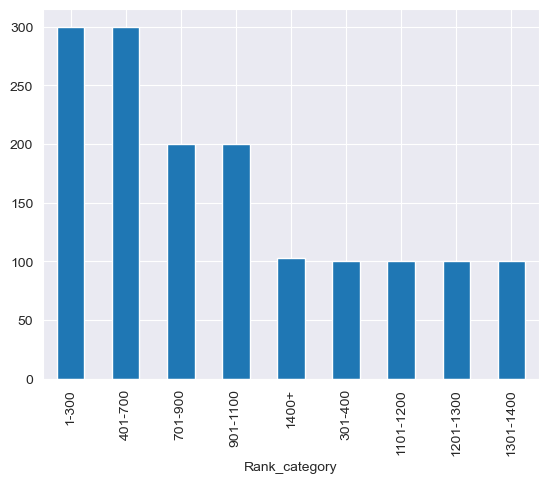

In [17]:
data['Rank_category'].value_counts().plot(kind='bar')